In [47]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize as min

In [53]:
x = np.arange(0., 1.0+1.0E-10, 0.05)
y = 0.01*np.cos(2.*np.pi*x)
np.shape(x)

(21,)

In [76]:
def norm(a):
    return np.linalg.norm(a);

def normal(t):
    tx, ty = t
    n = np.array([-ty, tx]);
    return n

def tangent(a, b, c):
    d1 = norm(b-a);
    d2 = norm(c-b)
    t = -a*d2/d1/(d1+d2) -b*(d1-d2)/d1/d2 + c*d1/d2/(d1+d2);
    l = norm(t);
    return (t/l)

def kappa(t1, t2, a, b):
    n = normal(b-a);  
    kn = t2 - t1;
    kappa = norm(kn)*np.sign(np.dot(kn,n))/norm(n);
    return kappa;
    
def tangent2(ta, tb, a, b):
    n = tb - ta;
    n = n*np.sign(kappa(ta, tb, a, b))/norm(n);
    t = -normal(n);
    return t;

def centroid(a,b):
    c = (a+b)*0.5
    return c;
   
def Hermite(a,b,ta,tb,s):
    l = norm(a-b);
    return ((2*(a-b) + l*(ta+tb))*s*s*s + (-3*(a-b) - l*(2*ta+tb))*s*s +  l*ta*s + a)

def dHermite(a,b,ta,tb,s):
    l = norm(a-b);
    t = 3*(2*(a-b)/l + (ta+tb))*s*s + 2*(-3*(a-b)/l - (2*ta+tb))*s +  ta
    return (t/norm(t))

def kappa5(a,b,c,d,e):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    td = tangent(c,d,e);
    xl = Hermite(b,c,tb,tc,0.5);
    xr = Hermite(c,d,tc,td,0.5);
    tl = dHermite(b,c,tb,tc,0.5);
    tr = dHermite(c,d,tc,td,0.5);
    return (kappa(tl, tr, xl, xr))

def kappa4(a,b,c,d):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    return (kappa(tb, tc, b, c))

In [77]:
y2 = y + 0.0005*np.random.normal(0,1,21)

np.shape(y2) 

(21,)

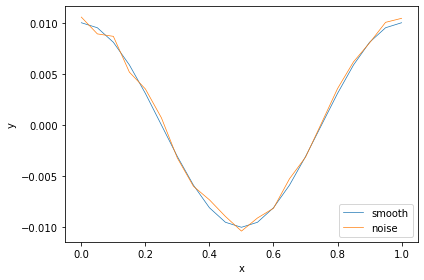

In [78]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "smooth")
ax1.plot(x, y2, linewidth = 0.7, label = "noise")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

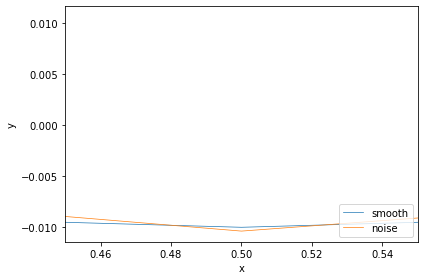

In [79]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "smooth")
ax1.plot(x, y2, linewidth = 0.7, label = "noise")
ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [91]:
def boundary(x,y):
    xb = []
    yb = []
    for i_ in range(5):
        i = 5-i_;
        xb.append(-x[i])
        yb.append(y[i])
    l, = np.shape(x)
    for i in range(l):
        xb.append(x[i])
        yb.append(y[i])
    for i_ in range(5):
        i = (l-2)-i_
        xb.append(2.0-x[i])
        yb.append(y[i])
    return xb,yb
def boundary_symm(s):
    sb = []
    for i_ in range(5):
        i = 5-i_;
        sb.append(s[i])
    l, = np.shape(s)
    for i in range(l):
        sb.append(s[i])
    for i_ in range(5):
        i = (l-2)-i_
        sb.append(s[i])
    return sb

def kappa5_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa5(a,b,c,d,e))
    return k;
def kappa5_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa5(a,b,c,d,e))
    return k;

def dk_ds_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa5(a,b,c,d,e))
    return k;

xb,yb = boundary(x,y)

kappav = kappa_vector(xb,yb)


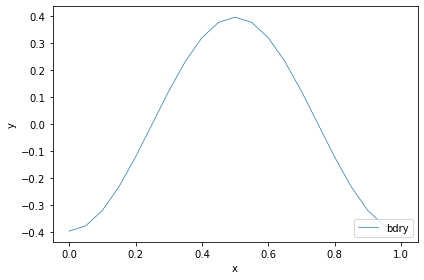

In [92]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, kappav, linewidth = 0.7, label = "bdry")
#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [ ]:

def dkds(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    for i_ in range(l):
        i = i_ + 5;
        
    

z = []
ie_, = np.shape(x);
ie_ = ie_ - 2
for i_ in range(ie_):
    i = i_ + 1 
    z.append(i)

def dkappa(x,y):
    r,  =np.shape(x);
    x2 = [];
    y2 = [];
    for i in range():